# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import acquire
import prepare
import modeling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
#setting a seed

seed = 42

# Acquire and Preparing data

In [3]:
data = acquire.get_telco_data()

In [4]:
data = prepare.prep_telco(data)

In [7]:
data.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,internet_service_type,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,One year,DSL,0,0,1,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,Month-to-month,DSL,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,Month-to-month,Fiber optic,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,Month-to-month,Fiber optic,1,1,1,0,1,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,Month-to-month,Fiber optic,1,0,1,0,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1


In [8]:
data.shape 

(7043, 30)

In [9]:
data.dtypes

customer_id                                object
senior_citizen                              int64
tenure                                      int64
monthly_charges                           float64
total_charges                             float64
contract_type                              object
internet_service_type                      object
churn_Yes                                   uint8
gender_Male                                 uint8
partner_Yes                                 uint8
dependents_Yes                              uint8
phone_service_Yes                           uint8
multiple_lines_Yes                          uint8
online_security_Yes                         uint8
online_backup_Yes                           uint8
device_protection_Yes                       uint8
tech_support_Yes                            uint8
streaming_tv_Yes                            uint8
streaming_movies_Yes                        uint8
paperless_billing_Yes                       uint8


In [10]:
train, validate, test = prepare.split_train_test(data, 'churn_Yes')

In [11]:
train.shape, validate.shape, test.shape

((3521, 30), (2113, 30), (1409, 30))

In [12]:
train.head(2)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,internet_service_type,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6909,9804-ICWBG,0,1,69.9,69.9,Month-to-month,Fiber optic,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
1126,1644-IRKSF,0,33,93.8,3124.5,One year,Fiber optic,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0


# Exploratory Analysis Questions

## Is whether or not a customer churns independent of their internet service type?

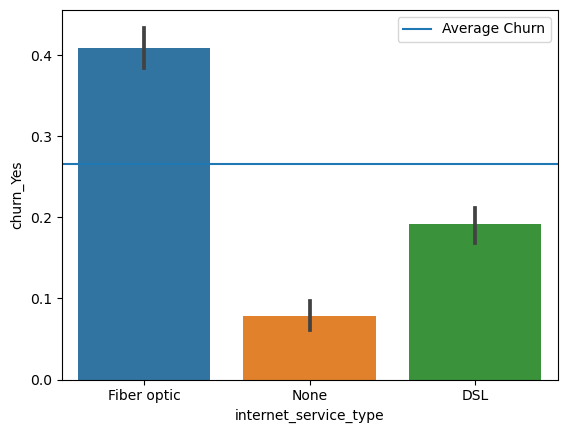

In [12]:
sns.barplot(x='internet_service_type', y='churn_Yes', data=train)
churn_rate = train.churn_Yes.mean()
plt.axhline(churn_rate, label="Average Churn")
plt.legend()
plt.show()

Null hypothesis here is that there is no relationship between internet service type and churn status

Alternative hypothesis is that there *is* a relationship beteween the two


In [13]:
observed = pd.crosstab(train.internet_service_type, train.churn_Yes)

In [14]:
observed

churn_Yes,0,1
internet_service_type,,
DSL,972,230
Fiber optic,933,646
None,682,58


In [15]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [16]:
chi2, p, degf, expected

(333.96263321477136,
 3.0264647258336764e-73,
 2,
 array([[ 883.15080943,  318.84919057],
        [1160.14569725,  418.85430275],
        [ 543.70349333,  196.29650667]]))

In [17]:
alpha = .05

In [18]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

alpha = .05
print('Is p-value < alpha?', p < alpha)

Observed Values

[[972 230]
 [933 646]
 [682  58]]
---
Expected Values

[[ 883  318]
 [1160  418]
 [ 543  196]]
---

chi^2 = 333.9626
p     = 0.0000
Is p-value < alpha? True


Takeaways:

- According to the Chi2 test, there *is* a relationship between internet service type and churn. The chi^2 value is very high, with the p-value being very low, meaning there is a large difference in the observed and expected values.

- There are significantly more people who had fiber optic internet that churned than people who had DSL or who had no internet.

- Customers with DSL and no internet are well below average when it comes to customers who have churned, while fiber optic is way above average

## Are contract type and churn status related?


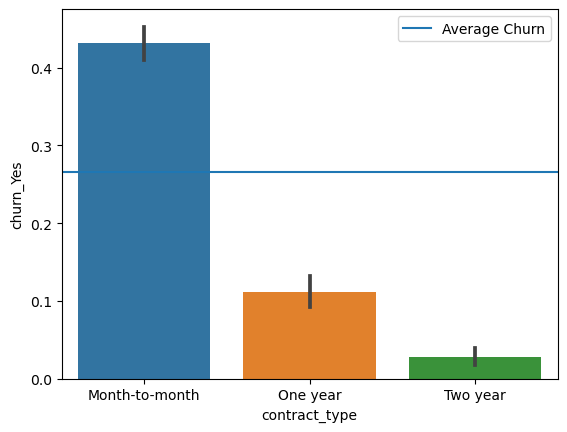

In [19]:
sns.barplot(x='contract_type', y='churn_Yes', data=train)
churn_rate = train.churn_Yes.mean()
plt.axhline(churn_rate, label="Average Churn")
plt.legend()
plt.show()

Null Hypothesis here is that there is *no* relationship between contract type and churn

Alternative Hypothesis here is that there *is* a relationship between contract type and churn

In [20]:
observed2 = pd.crosstab(train.contract_type, train.churn_Yes)
observed2

churn_Yes,0,1
contract_type,,
Month-to-month,1089,825
One year,679,85
Two year,819,24


In [21]:
chi2, p, degf, expected = stats.chi2_contingency(observed2)

chi2, p, degf, expected

(605.3651310007383,
 3.5207244385635105e-132,
 2,
 array([[1406.28173814,  507.71826186],
        [ 561.33712014,  202.66287986],
        [ 619.38114172,  223.61885828]]))

In [22]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(expected.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

print('Is p-value < alpha?', p < alpha)


Observed Values

[[972 230]
 [933 646]
 [682  58]]
---
Expected Values

[[1406  507]
 [ 561  202]
 [ 619  223]]
---

chi^2 = 605.3651
p     = 0.0000
Is p-value < alpha? True


Takeaways:

- According to the chi^2 test, there *is a relationship between contract type and customers who have churned.

- A **significantly** larger percentage of people who were month-to-month churned verus the other two categories

- There *were* a lot more customers who had month-to-month contracts than those who had one or two year contracts, but even still the percentage is much higher. The number of one and two year contract customers who churn are well below the average, while those who are month to month are way above.

## What is the relationship between phone service and churn?

<AxesSubplot:xlabel='phone_service_Yes', ylabel='churn_Yes'>

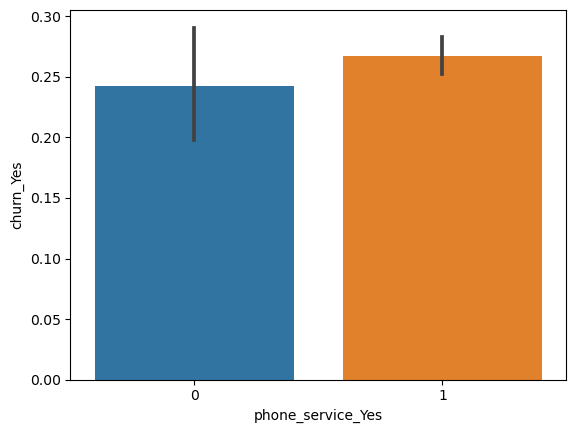

In [23]:
sns.barplot(x='phone_service_Yes', y='churn_Yes', data=train)

Takeaways:

- The churn rates for customers who had phone service and those who didn't is very similar, though the confidence interval for those who didn't churn is much larger

## Does Gender factor into churn?

<AxesSubplot:xlabel='gender_Male', ylabel='churn_Yes'>

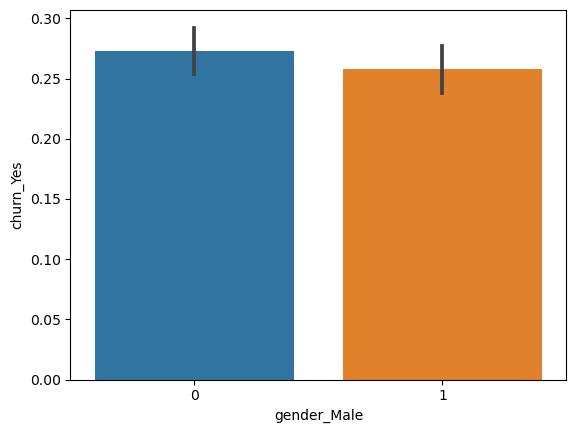

In [24]:
sns.barplot(x='gender_Male', y='churn_Yes', data=train)

Takeaways:

- The churn rate for for males and females are very similar, so it is not likely that gender plays a significant role in churn

## Do monthly charges differ for different contract types?

<AxesSubplot:xlabel='contract_type', ylabel='monthly_charges'>

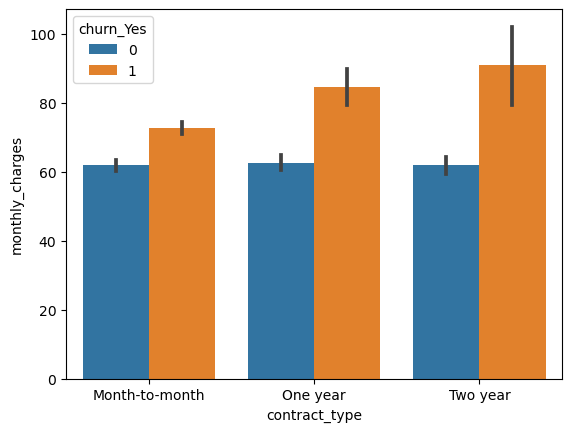

In [25]:
sns.barplot(x='contract_type', y='monthly_charges',
            hue='churn_Yes', data=train)

In [26]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,internet_service_type,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6909,9804-ICWBG,0,1,69.9,69.90,Month-to-month,Fiber optic,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
1126,1644-IRKSF,0,33,93.8,3124.50,One year,Fiber optic,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0
453,0666-UXTJO,1,34,85.2,2874.45,Month-to-month,Fiber optic,0,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0
2015,2907-ILJBN,0,11,20.6,233.90,One year,None,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2891,4118-CEVPF,1,35,110.8,3836.30,One year,Fiber optic,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,1,0,0,0


Takeaways:

- Monthly charges do vary somewhat when compared to contract type and if they've churned, however when comparing those same variables to customers who haven't churned, monthly charges are consistent across the board.

- Charges for customers who churned are all higher than those who haven't.


# Overall takeaways:

- There is a significant relationship between internet service type and churn.

- The majority of people had fiber optic internet, which also includes way more people who've churned.

- There's a significant relationship between contract type and churn, with an overwhelming majority of people who've churned having had a month-to-month contract

- Neither phone service or gender seem to have a significant relationship here

- Monthly charges seems to have something of a relationship with churn, as we can see that the people who have churned have all had their monthly charges increase, while the customers who haven't churned seem to be paying a more consistent amount. the most interesting part is that month to month has the smallest difference in their payments, yet that group has the most churn

## Plan for my models:

- I plan on running two models for each algorithm we've learned, and for the first one I will include everything from my prepared data, minus the conctract and internet types, as they're object type data. 

- The second model for each will have the senior citizen, gender, phone service removed to check if that improves accuracy

# Modeling

In [27]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,internet_service_type,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_Yes,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
6909,9804-ICWBG,0,1,69.9,69.90,Month-to-month,Fiber optic,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
1126,1644-IRKSF,0,33,93.8,3124.50,One year,Fiber optic,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0
453,0666-UXTJO,1,34,85.2,2874.45,Month-to-month,Fiber optic,0,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0
2015,2907-ILJBN,0,11,20.6,233.90,One year,None,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2891,4118-CEVPF,1,35,110.8,3836.30,One year,Fiber optic,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,1,0,0,0


In [41]:
#creating X and y dataframes for my first run through of models
X_train = train.drop(columns=['contract_type', 
                              'internet_service_type', 
                              'churn_Yes',
                              'customer_id'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['contract_type', 
                               'internet_service_type', 
                               'churn_Yes',
                               'customer_id'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['contract_type', 
                            'internet_service_type', 
                            'churn_Yes',
                            'customer_id'])
y_test = test.churn_Yes

## Decision Tree #1

- Everything included in this

- Will create a model with max depth 3, and then try 5

In [ ]:
X_train = X_train.astype(int)

In [ ]:
y_train = y_train.astype(int)

In [ ]:
data.head(1)

In [ ]:
#creating my baseline accuracy

data['baseline'] = data['churn_Yes'].value_counts().idxmax()

In [ ]:
(data['churn_Yes'] == data['baseline']).mean()

Baseline accuracy is 73.5%

In [ ]:
#creating the model object

clf = DecisionTreeClassifier(max_depth=3, random_state=42)

#fitting the model

clf = clf.fit(X_train, y_train)

#making train predictions

y_pred = clf.predict(X_train)

In [ ]:
plt.figure(figsize=(10, 5))
plot_tree(clf, feature_names=X_train.columns, 
          class_names=['0','1'], rounded=True)
plt.show()

In [ ]:
clf.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, y_pred))

Model 1 accuracy is 79%

## Decision Tree #2 

(Higher Depth)

In [ ]:
#creating the model object

clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)

#fitting the model

clf2 = clf2.fit(X_train, y_train)

# making train predictions

y_pred2 = clf2.predict(X_train)

In [ ]:
plt.figure(figsize=(10, 5))
plot_tree(clf2, feature_names=X_train.columns, 
          class_names=['0','1'], rounded=True)
plt.show()

In [ ]:
clf2.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, y_pred2))

Accuracy with depth of 5 is 80%, so it is very slightly better

## Decision Tree #3 

(Even more Depth!)

In [ ]:
#creating the model object

clf3 = DecisionTreeClassifier(max_depth=8, 
                              random_state=42)

#fitting the model

clf3 = clf3.fit(X_train, y_train)

# making train predictions

y_pred3 = clf3.predict(X_train)

In [ ]:
plt.figure(figsize=(10, 5))
plot_tree(clf3, feature_names=X_train.columns, 
          class_names=['0','1'], rounded=True)
plt.show()

In [ ]:
clf3.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, y_pred3))

This is the best result yet, at 85%

- clf, y_pred for model #1
- clf2, y_pred2 for model #2
- clf3, y_pred3 for model #3

## Random Forest #1 

In [ ]:
#creating the object
rf = RandomForestClassifier(max_depth=3, 
                            min_samples_leaf=3,
                            n_estimators=100, 
                            random_state=42, )

#fitting the model
rf.fit(X_train, y_train)

#evaluate feature importance
print(rf.feature_importances_)

In [ ]:
#make the predictions
y_preds = rf.predict(X_train)

In [ ]:
#estimate the probabilities
y_preds_proba = rf.predict_proba(X_train)

In [ ]:
#obtaining the score
rf.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, y_preds))

model accuracy 79%

## Random Forest #2 

(Higher Depth)

In [ ]:
#creating the object
rf2 = RandomForestClassifier(max_depth=6, 
                            min_samples_leaf=3,
                            n_estimators=100, 
                            random_state=42, )

#fitting the model
rf2.fit(X_train, y_train)

#evaluate feature importance
print(rf2.feature_importances_)

In [ ]:
#make the predictions
y_preds2 = rf2.predict(X_train)

In [ ]:
#obtaining the score
rf2.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, y_preds2))

model accuracy is 82%

## Random Forest #3

(MOAR Depth)

In [ ]:
rf3 = RandomForestClassifier(max_depth=10,
                            min_samples_leaf=3,
                            n_estimators=100,
                            random_state=42)

rf3.fit(X_train, y_train)

y_preds3 = rf3.predict(X_train)

In [ ]:
rf3.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, y_preds3))

Model accuracy is 87%

## KNN #1

In [ ]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

#fit the model
knn.fit(X_train, y_train)

#make predictions
knn_pred = knn.predict(X_train)

In [ ]:
#estimate probability
knn_pred_proba = knn.predict_proba(X_train)

In [ ]:
knn.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, knn_pred))

Model accuracy is 83%

## KNN #2

(More Neighbors)

In [ ]:
# weights = ['uniform', 'density']
knn2 = KNeighborsClassifier(n_neighbors=8, weights='uniform')

#fit the model
knn2.fit(X_train, y_train)

#make predictions
knn_pred2 = knn2.predict(X_train)

In [ ]:
knn2.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, knn_pred2))

Model accuracy is 81%

## KNN #3 

(Less Neighbors than first model)

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=3, weights='uniform')

knn3.fit(X_train, y_train)

knn_pred3 = knn3.predict(X_train)

In [ ]:
knn3.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, knn_pred3))

Model accuracy is 86%

## Logistic Regression #1

In [ ]:
#creating the object
logit = LogisticRegression(C=.1, class_weight={0:1, 1:99}, 
                           random_state=42, intercept_scaling=1,
                          solver='lbfgs')

#fit the model
logit.fit(X_train, y_train)

#make predictions
logit_pred = logit.predict(X_train)

In [ ]:
#evaluate the importance (weight) of each feature
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

In [ ]:
#estimate probability
logit_pred_proba = logit.predict_proba(X_train)

In [ ]:
logit_pred

In [ ]:
logit_pred_proba

In [ ]:
logit.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, logit_pred))

By far the worst so far, accuracy is 38%

## Logistic Regression #2 

(Removing the class_weight to default)

In [ ]:
#creating the object
logit2 = LogisticRegression(C=.1, random_state=42, 
                           intercept_scaling=1, solver='lbfgs')

#fit the model
logit2.fit(X_train, y_train)

#make predictions
logit_pred2 = logit2.predict(X_train)

In [ ]:
logit2.score(X_train, y_train)

In [ ]:
#estimate probability
logit_pred_proba2 = logit2.predict_proba(X_train)

In [ ]:
print(classification_report(y_train, logit_pred2))

Performing *much* better at 81% accuracy

## Logistic Regression #3 

(Keeping the change in the second model, but also setting C to default)

In [ ]:
#creating the object
logit3 = LogisticRegression(random_state=42, intercept_scaling=1, 
                            solver='lbfgs')

#fit the model
logit3.fit(X_train, y_train)

#make predictions
logit_pred3 = logit3.predict(X_train)

In [ ]:
logit3.score(X_train, y_train)

In [ ]:
print(classification_report(y_train, logit_pred3))

Model performed very slightly better than the previous, still 81% accuracy

# Model Performances on Validate sets

## Decision Tree #1

In [ ]:
clf.score(X_validate, y_validate)

## Decision Tree #2

In [ ]:
clf2.score(X_validate, y_validate)

## Decision Tree #3

In [ ]:
clf3.score(X_validate, y_validate)

## Random Forest #1

In [ ]:
rf.score(X_validate, y_validate)

## Random Forest #2

In [ ]:
rf2.score(X_validate, y_validate)

## Random forest #3

In [ ]:
rf3.score(X_validate, y_validate)

## KNN #1

In [ ]:
knn.score(X_validate, y_validate)

## KNN #2

In [ ]:
knn2.score(X_validate, y_validate)

## KNN #3 model

In [ ]:
knn3.score(X_validate, y_validate)

## Logistic Regression #1

In [ ]:
logit.score(X_validate, y_validate)

## Logistic Regression #2

In [ ]:
logit2.score(X_validate, y_validate)

## Logistic Regression #3

In [ ]:
logit3.score(X_validate, y_validate)

# Best models

My best models on the validates sets are:

1. Logistic Regression #2
2. Logistic Regression #3
3. Random Forest #2
4. Decision Tree #1

## Best model on test data

In [ ]:
logit2.score(X_test, y_test)

In [ ]:
logit_test_proba = logit2.predict_proba(X_test)

In [ ]:
logit_test_proba = pd.DataFrame(logit_test_proba)

In [ ]:
logit_test_pred = logit2.predict(X_test)

In [ ]:
logit_test_pred = pd.DataFrame(logit_test_pred)

In [ ]:
test_cust_id = test['customer_id']

In [ ]:
#customer ids from test data
test_cust_id

In [ ]:
logit_test_proba = logit_test_proba.drop(columns=0)

In [ ]:
logit_test_proba

In [ ]:
logit_test_pred

In [ ]:
predictions = pd.DataFrame(test_cust_id)

In [ ]:
predictions.reset_index(inplace=True)

In [ ]:
predictions = pd.concat([predictions, 
                         logit_test_proba, 
                         logit_test_pred], axis=1)

In [ ]:
predictions = predictions.drop(columns='index')

In [ ]:
predictions

In [ ]:
predictions = predictions.rename(columns= {1: 'probability_of_churn', 
                                           0: 'prediction_of_churn'})

In [ ]:
predictions

In [ ]:
(predictions['prediction_of_churn'] == 1).mean()

In [ ]:
predictions.to_csv('predictions.csv')

Accuracy stayed very close to the validate result, at 80%

# Visualizations

## Provide the context of the target variable through a visualization (distribution of the values, e.g.)



In [ ]:
data.head(1)

In [ ]:
sns.barplot(x='contract_type',
            y='churn_Yes',
            hue='internet_service_type',
            data=data)

plt.title("How Internet and Contract Types Affect Churn")
plt.ylabel("Has Churned")
plt.xlabel("Contract Type")
plt.show()

## On your best model, a chart visualizing how it performed on test would be valuable.



In [ ]:
test.head(1)

In [ ]:
test_pred = predictions['prediction_of_churn']

In [ ]:
test['baseline'] = test['churn_Yes'].value_counts().idxmax()

In [ ]:
(test['churn_Yes'] == test['baseline']).mean()

In [ ]:
test = pd.concat([test, test_pred], axis=1)

In [ ]:
test = test.reset_index()

In [ ]:
data = [73, 27]
labels = ['Baseline Correct', 'Baseline Incorrect']

colors = sns.color_palette('pastel')[0:2]

plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Baseline Accuracy")
plt.show()

data1 = [81, 19]
labels1 = ['Model Correct', 'Model Incorrect']

colors = sns.color_palette('pastel')[2:4]

plt.pie(data1, labels=labels1, colors=colors, autopct='%.0f%%')
plt.title("Best Performing Model")
plt.show()

# Final takeaways and Recommedations

Takeaways:

- Gender and Age aren't huge facotrs when it comes to churn
- The **biggest** factor seems to be Contract type with internet type also playing a significant role
- Customers that had fiber optic internet rather than DSL or no internet churned much more 

Recommendations

- Provide better support for customers with fiber optic internet
- Make improvements to month to month contract plans to make it more appealing to customers
- alternatively, or in addition to the above, make the one and two year contract types more appealing as customers with those churned significantly less


# functions made post project

In [ ]:
def make_baseline(df, baseline, col):
    
    df[baseline] = df[col].value_counts().idxmax()    

    base = (df[col] == df[baseline]).mean()
    
    print(f'Baseline Accuracy is: {base:.3}')
    

In [ ]:
def chi2_report(df, col, target):
    '''
    This function is to be used to generate a crosstab for my observed data, and use that the run a chi2 test, and generate the report values from the test
    '''
    
    observed = pd.crosstab(df[col], df[target])
    
    chi2, p, degf, expected = stats.chi2_contingency(observed)

    alpha = .05
    
    print('Observed Values\n')
    print(observed.values)
    
    print('---\nExpected Values\n')
    print(expected.astype(int))
    print('---\n')

    print(f'chi^2 = {chi2:.4f}') 
    print(f'p     = {p:.4f}')

    print('Is p-value < alpha?', p < alpha)

In [ ]:
def xy_train(train):
    
    X_train = train.drop(columns=['contract_type', 
                                  'internet_service_type', 
                                  'churn_Yes',
                                  'customer_id'])
    y_train = train.churn_Yes

    X_validate = val.drop(columns=['contract_type', 
                                   'internet_service_type', 
                                   'churn_Yes',
                                   'customer_id'])
    y_validate = val.churn_Yes

    X_test = test.drop(columns=['contract_type', 
                                'internet_service_type', 
                                'churn_Yes',
                                'customer_id'])
    y_test = test.churn_Yes

In [23]:
def rf_gen():
    
    metrics = []

    for i in range(1, 20):
    
        '''
        This function will create a dataframe of Random Forest models of varying max_depths and compare the differences from the train and validate sets
        '''
        # Make the model
        rf = RandomForestClassifier(max_depth=i, min_samples_leaf=3, n_estimators=200, random_state=42)

        # Fit the model (on train and only train)
        rf = rf.fit(X_train, y_train)

        # Use the model
        # We'll evaluate the model's performance on train, first
        in_sample_accuracy = rf.score(X_train, y_train)
    
        out_of_sample_accuracy = rf.score(X_validate, y_validate)

        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
            }
    
        metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df["difference"] = df.train_accuracy - df.validate_accuracy
    return df

In [24]:
rf_gen()

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734734,0.734501,0.000234
1,2,0.752059,0.755324,-0.003265
2,3,0.785004,0.797444,-0.012440
3,4,0.796649,0.802177,-0.005528
4,5,0.806021,0.810222,-0.004201
5,6,0.816245,0.808329,0.007916
6,7,0.826470,0.811169,0.015301
7,8,0.839534,0.817795,0.021740
8,9,0.850895,0.813535,0.037359
9,10,0.867935,0.809749,0.058186


In [28]:
def dectree_gen():
    
    metrics = []

    for i in range(1, 20):
    
        '''
        This function will create a dataframe of Random Forest models of varying max_depths and compare the differences from the train and validate sets
        '''
        # Make the model
        dectree = DecisionTreeClassifier(max_depth=i, random_state=42)

        # Fit the model (on train and only train)
        dectree = dectree.fit(X_train, y_train)

        # Use the model
        # We'll evaluate the model's performance on train, first
        in_sample_accuracy = dectree.score(X_train, y_train)
    
        out_of_sample_accuracy = dectree.score(X_validate, y_validate)

        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
            }
    
        metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df["difference"] = df.train_accuracy - df.validate_accuracy
    return df

In [29]:
dectree_gen()

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734734,0.734501,0.000234
1,2,0.759443,0.768575,-0.009132
2,3,0.791252,0.794605,-0.003352
3,4,0.793809,0.794132,-0.000323
4,5,0.806589,0.803124,0.003466
5,6,0.817381,0.793658,0.023723
6,7,0.833854,0.788452,0.045402
7,8,0.850043,0.766682,0.083360
8,9,0.869355,0.756744,0.112611
9,10,0.894348,0.752011,0.142337


In [30]:
def knn_gen():
    
    metrics = []

    for i in range(1, 20):
    
        '''
        This function will create a dataframe of Random Forest models of varying max_depths and compare the differences from the train and validate sets
        '''
        # Make the model
        knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')

        # Fit the model (on train and only train)
        knn = knn.fit(X_train, y_train)

        # Use the model
        # We'll evaluate the model's performance on train, first
        in_sample_accuracy = knn.score(X_train, y_train)
    
        out_of_sample_accuracy = knn.score(X_validate, y_validate)

        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy
            }
    
        metrics.append(output)
    
    df = pd.DataFrame(metrics)
    df["difference"] = df.train_accuracy - df.validate_accuracy
    return df

In [31]:
knn_gen()

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.998580,0.731661,0.266919
1,2,0.850895,0.763370,0.087525
2,3,0.855723,0.750592,0.105131
3,4,0.824198,0.771415,0.052783
4,5,0.823346,0.764789,0.058556
5,6,0.814257,0.773781,0.040476
6,7,0.815393,0.774255,0.041139
7,8,0.806305,0.779460,0.026845
8,9,0.805169,0.782300,0.022869
9,10,0.798921,0.786086,0.012835


In [9]:
modeling.knn_gen(data, 'churn_Yes')

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.998580,0.731661,0.266919
1,2,0.850895,0.763370,0.087525
2,3,0.855723,0.750592,0.105131
3,4,0.824198,0.771415,0.052783
4,5,0.823346,0.764789,0.058556
5,6,0.814257,0.773781,0.040476
6,7,0.815393,0.774255,0.041139
7,8,0.806305,0.779460,0.026845
8,9,0.805169,0.782300,0.022869
9,10,0.798921,0.786086,0.012835


In [8]:
modeling.dectree_gen(data, 'churn_Yes')

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734734,0.734501,0.000234
1,2,0.759443,0.768575,-0.009132
2,3,0.791252,0.794605,-0.003352
3,4,0.793809,0.794132,-0.000323
4,5,0.806589,0.803124,0.003466
5,6,0.817381,0.793658,0.023723
6,7,0.833854,0.788452,0.045402
7,8,0.850043,0.766682,0.083360
8,9,0.869355,0.756744,0.112611
9,10,0.894348,0.752011,0.142337


In [9]:
modeling.rf_gen(data, 'churn_Yes')

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734734,0.734501,0.000234
1,2,0.752059,0.755324,-0.003265
2,3,0.785004,0.797444,-0.012440
3,4,0.796649,0.802177,-0.005528
4,5,0.806021,0.810222,-0.004201
5,6,0.816245,0.808329,0.007916
6,7,0.826470,0.811169,0.015301
7,8,0.839534,0.817795,0.021740
8,9,0.850895,0.813535,0.037359
9,10,0.867935,0.809749,0.058186
